# ENTREGABLE 4

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# INSTRUCCIONES

Utilizar el archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas y aplicar las técnicas de normalización del entregable 3.

In [3]:
# imports
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

# Objetivo

Generar un model de clasificación capaz de predecir la clase de flor en función de las carácterísticas del dataset

* Aplicar las técnicas oportunas de procesamiento de datos

* Generar split de los datos

* Valorar diferentes modelos de clasificación

* Comparación entre modelos

* Ensemble

* Métricas

* Conclusiones finales

In [4]:
# imports
import pandas as pd
from google.colab import drive
drive.mount('/gdrive')

from google.colab import drive
drive.mount('/content/drive')

ruta = '/content/drive/MyDrive/dataset_banco_clean.csv'
data = pd.read_csv(ruta)

print(data.shape)
data.head()

Mounted at /gdrive
Mounted at /content/drive
(45189, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


# Técnicas procesamiento de datos

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Información general del dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB
None


In [7]:
# Estadísticas descriptivas de las variables numéricas
print(data.describe())

                age        balance           day      duration      campaign  \
count  45189.000000   45189.000000  45189.000000  45189.000000  45189.000000   
mean      40.936445    1374.012149     15.807188    258.115006      2.763283   
std       10.618502    3924.370039      8.322549    257.349601      3.096579   
min       18.000000   -8019.000000      1.000000      1.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  527532.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45189.000000  45189.000000  
mean      40.178893      0.574166  
std      100.107295      1.907950  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [8]:
# Verificar valores faltantes
print(data.isnull().sum())


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


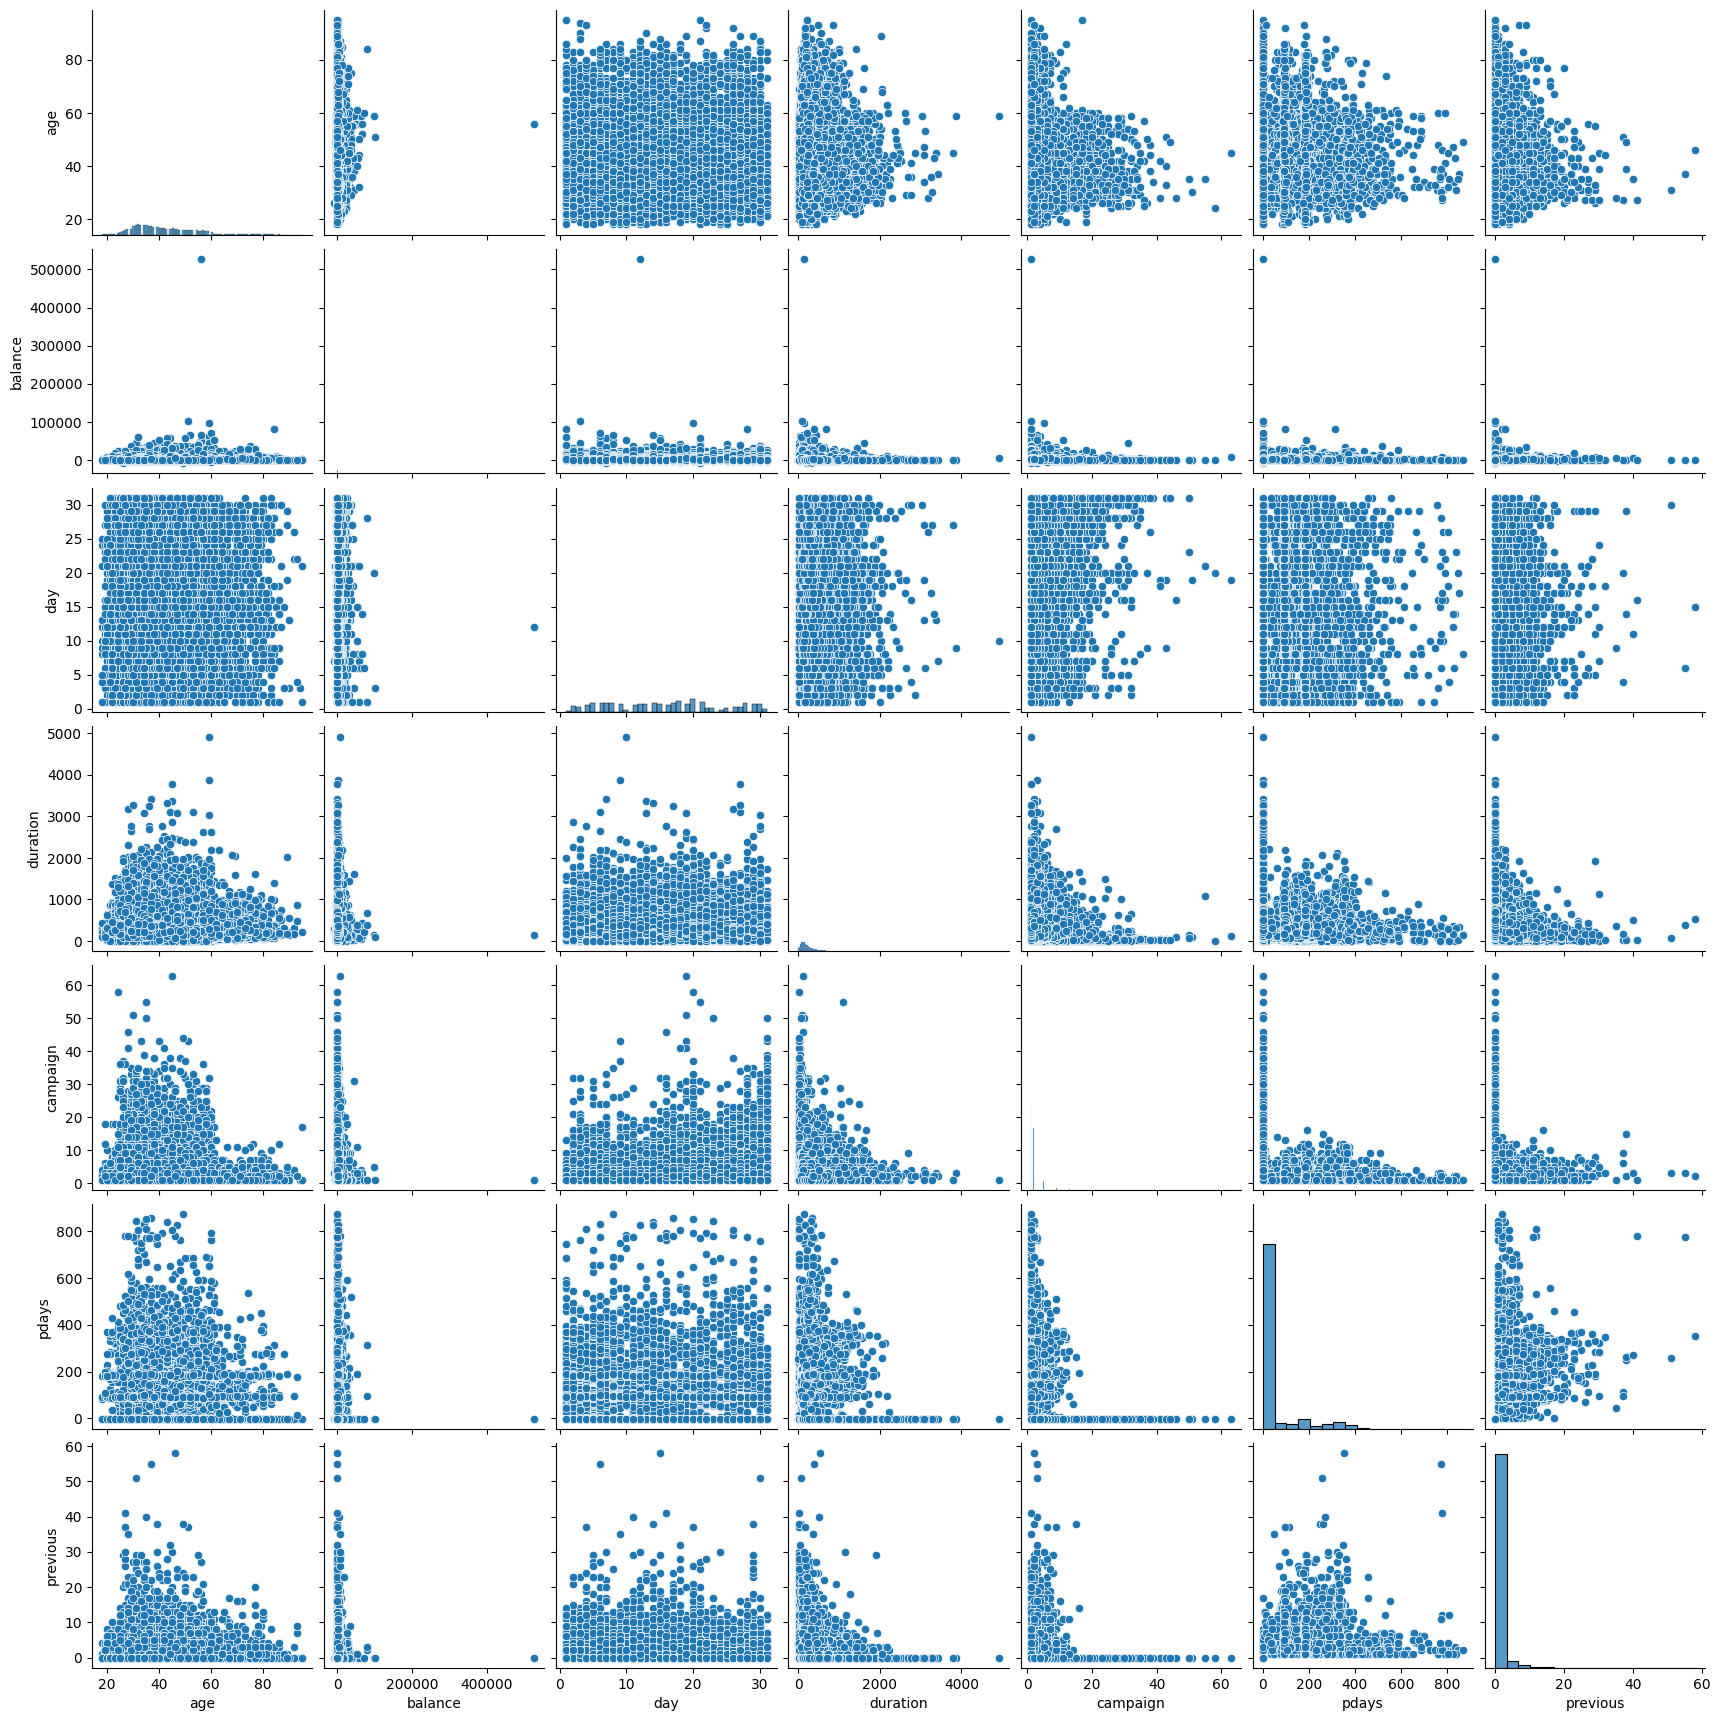

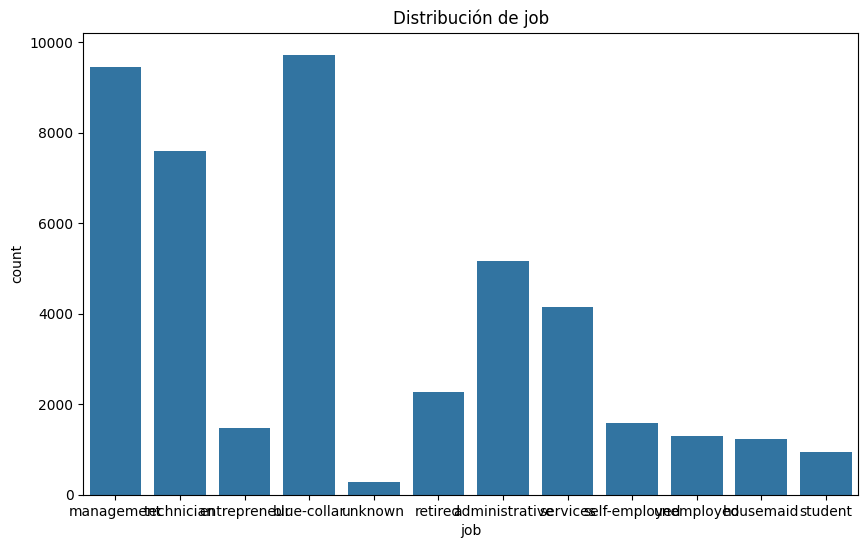

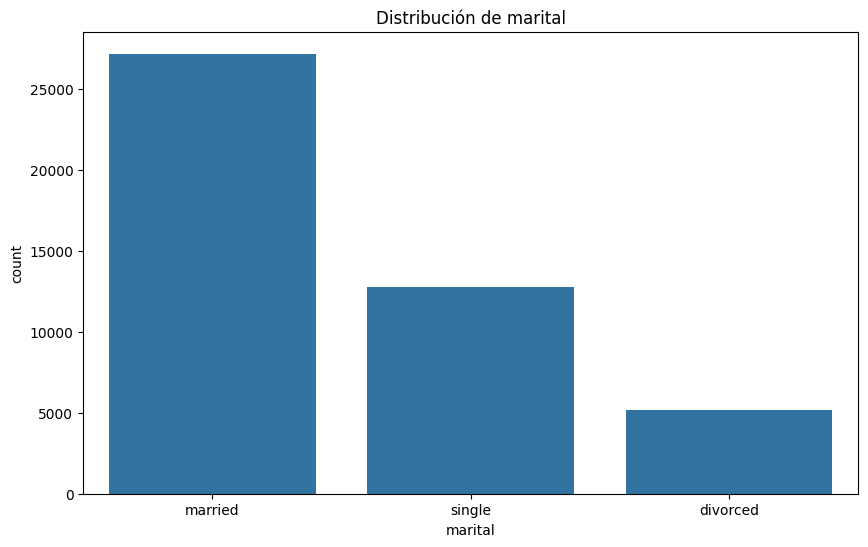

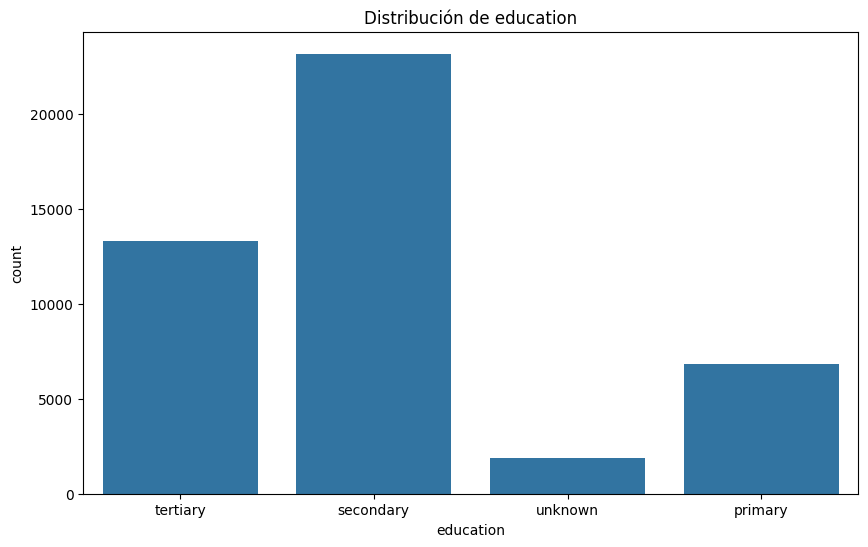

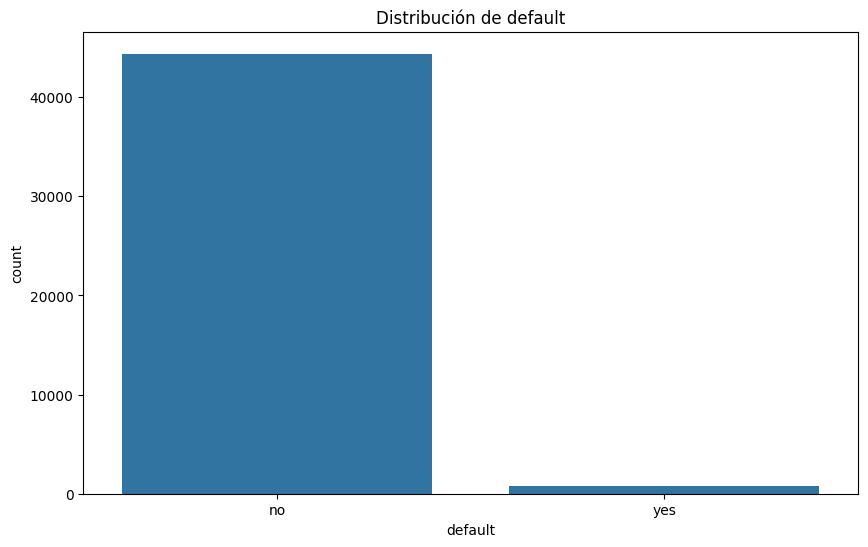

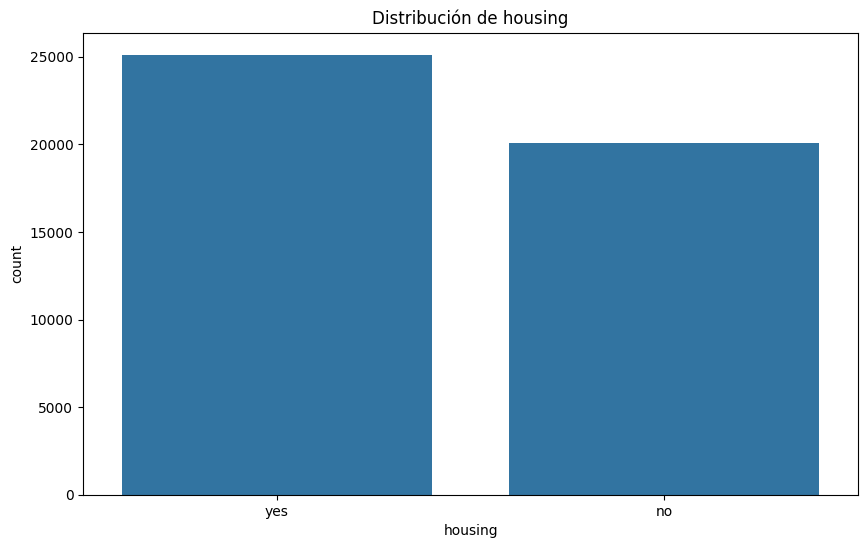

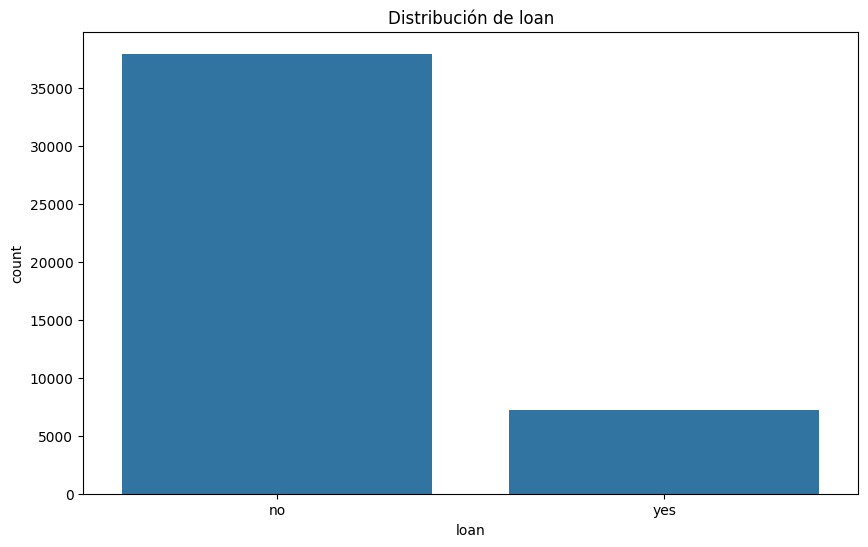

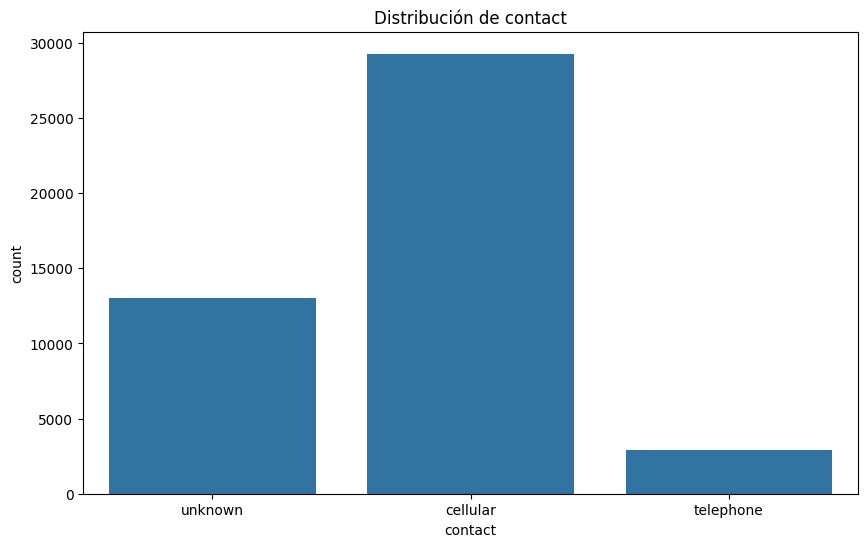

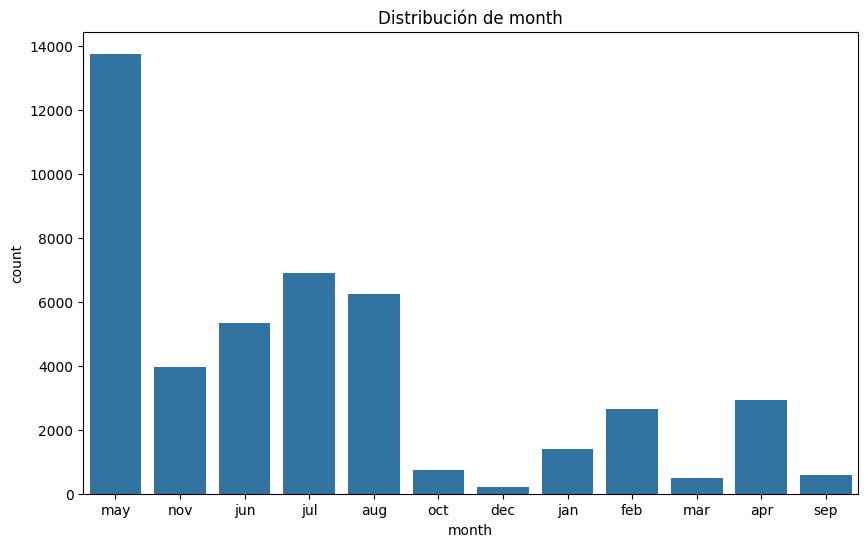

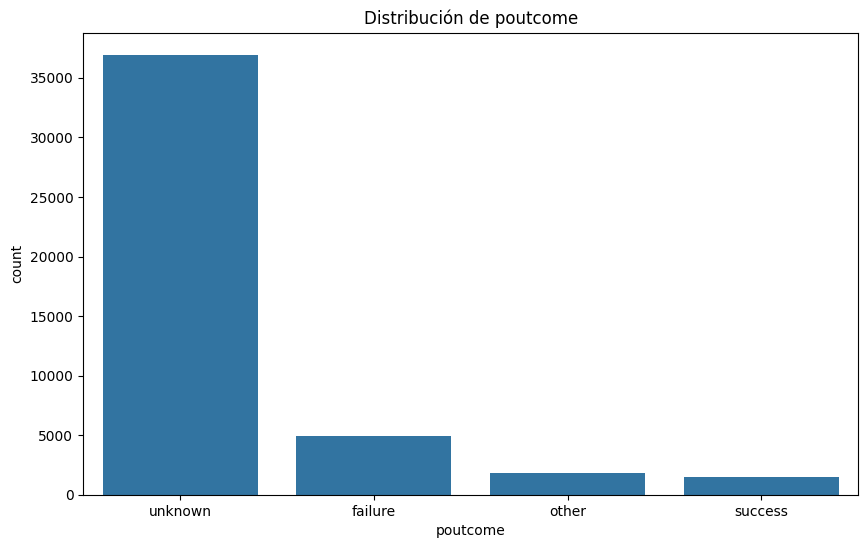

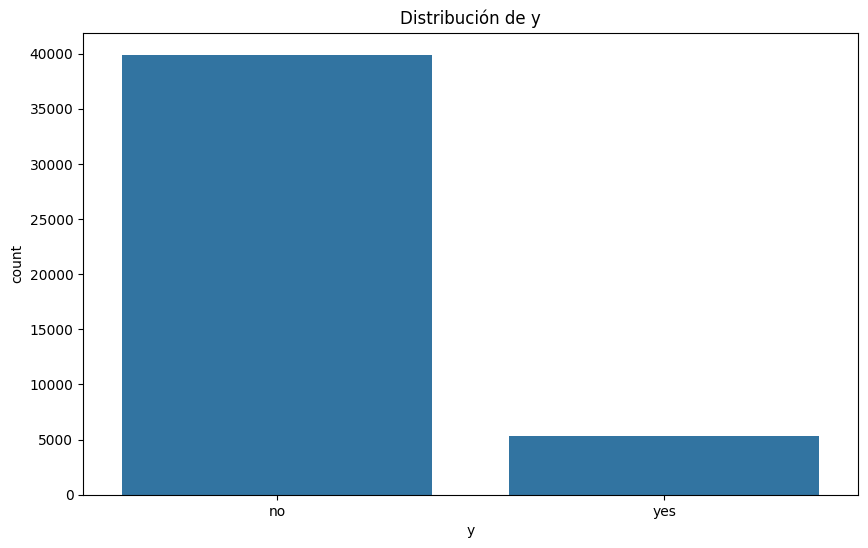

In [9]:
# Visualizar la distribución de las variables numéricas
sns.pairplot(data)
plt.show()

# Visualizar la distribución de las variables categóricas
for col in data.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10,6))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribución de {col}')
    plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder

# Inicializamos el LabelEncoder
label_encoder = LabelEncoder()

# Aplicamos Label Encoding a las columnas seleccionadas
data['job_encoded'] = label_encoder.fit_transform(data['job'])
data['marital_encoded'] = label_encoder.fit_transform(data['marital'])
data['default_encoded'] = label_encoder.fit_transform(data['default'])
data['housing_encoded'] = label_encoder.fit_transform(data['housing'])
data['loan_encoded'] = label_encoder.fit_transform(data['loan'])
data['contact_encoded'] = label_encoder.fit_transform(data['contact'])
data['poutcome_encoded'] = label_encoder.fit_transform(data['poutcome'])

# Muestra las primeras filas del dataframe con las variables codificadas
print(data.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no   2143.0     yes   no   
1   44    technician   single  secondary      no     29.0     yes   no   
2   33  entrepreneur  married  secondary      no      2.0     yes  yes   
3   47   blue-collar  married    unknown      no   1506.0     yes   no   
4   33       unknown   single    unknown      no      1.0      no   no   

   contact  day  ... previous  poutcome   y  job_encoded  marital_encoded  \
0  unknown    5  ...        0   unknown  no            4                1   
1  unknown    5  ...        0   unknown  no            9                2   
2  unknown    5  ...        0   unknown  no            2                1   
3  unknown    5  ...        0   unknown  no            1                1   
4  unknown    5  ...        0   unknown  no           11                2   

  default_encoded housing_encoded  loan_encoded  contact_encoded  \
0               0       

El Label Encoding se ha aplicado correctamente a las columnas seleccionadas, y las nuevas columnas marital_encoded, default_encoded, housing_encoded, loan_encoded, contact_encoded, y poutcome_encoded han sido agregadas al dataframe.

Cada valor único en las columnas originales ha sido asignado a un número entero único. Por ejemplo, en la columna marital, "married" se ha codificado como 1, "single" como 2, y así sucesivamente.

In [11]:
from sklearn.preprocessing import StandardScaler

# Inicializamos el StandardScaler
scaler = StandardScaler()

# Escalamos las características numéricas
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Muestra las primeras filas del dataframe con las características escaladas
print(data.head())


        age           job  marital  education default   balance housing loan  \
0  1.606982    management  married   tertiary      no  0.195954     yes   no   
1  0.288514    technician   single  secondary      no -0.342737     yes   no   
2 -0.747425  entrepreneur  married  secondary      no -0.349617     yes  yes   
3  0.571043   blue-collar  married    unknown      no  0.033633     yes   no   
4 -0.747425       unknown   single    unknown      no -0.349872      no   no   

   contact       day  ...  previous  poutcome   y  job_encoded  \
0  unknown -1.298557  ... -0.300937   unknown  no            4   
1  unknown -1.298557  ... -0.300937   unknown  no            9   
2  unknown -1.298557  ... -0.300937   unknown  no            2   
3  unknown -1.298557  ... -0.300937   unknown  no            1   
4  unknown -1.298557  ... -0.300937   unknown  no           11   

   marital_encoded default_encoded housing_encoded  loan_encoded  \
0                1               0               1    

Cada una de las características numéricas ha sido escalada de tal manera que ahora tienen una media de 0 y una desviación estándar de 1. Esto es evidente al observar las columnas como age, balance, day, duration, campaign, pdays y previous.

Por ejemplo, el primer valor en la columna age después de la normalización es aproximadamente 1.61, lo que significa que está 1.61 desviaciones estándar por encima de la media.

Esta normalización es importante para asegurar que las características estén en una escala comparable y para evitar que alguna característica domine sobre otras en el modelo de clasificación.

# Split datos

In [12]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = data.drop(columns=['y'])  # Features
y = data['y']  # Target variable

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% de entrenamiento y 20% de prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos de entrenamiento y prueba
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (36151, 23)
Shape of y_train: (36151,)
Shape of X_test: (9038, 23)
Shape of y_test: (9038,)


El conjunto de entrenamiento (X_train y y_train) contiene 36,151 muestras.
El conjunto de prueba (X_test y y_test) contiene 9,038 muestras.
Cada muestra tiene 23 características (variables) en total.

# Modelado

Seleccionamos varios modelos de clasificación

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


Entrenamiento de modelo

In [14]:
# Aplicar Label Encoding a las columnas categóricas
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Inicializar el LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label Encoding a las columnas categóricas
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Separar las características (X) y la variable objetivo (y)
X = data.drop(columns=['y'])  # Features
y = data['y']  # Target variable

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% de entrenamiento y 20% de prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar los modelos
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()

# Entrenar los modelos
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)


SVC()

In [16]:
print(svm)
print("Parameters:", svm.get_params())
print("Support vectors:", svm.support_vectors_)


SVC()
Parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Support vectors: [[-0.55907232  4.          2.         ...  0.          0.
   3.        ]
 [-0.65324861  9.          2.         ...  1.          2.
   3.        ]
 [-0.65324861  0.          1.         ...  0.          0.
   2.        ]
 ...
 [-0.93577747  0.          1.         ...  0.          2.
   3.        ]
 [-1.59501149  8.          2.         ...  0.          0.
   1.        ]
 [ 1.13610085  9.          1.         ...  0.          0.
   3.        ]]


Evaluación del modelo

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Función para evaluar un modelo y mostrar métricas
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='yes')
    recall = recall_score(y_test, y_pred, pos_label='yes')
    f1 = f1_score(y_test, y_pred, pos_label='yes')
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

# Evaluar cada modelo
print("Logistic Regression:")
evaluate_model(logistic_regression, X_test, y_test)

print("\nDecision Tree:")
evaluate_model(decision_tree, X_test, y_test)

print("\nRandom Forest:")
evaluate_model(random_forest, X_test, y_test)

print("\nSVM:")
evaluate_model(svm, X_test, y_test)


Logistic Regression:
Accuracy: 0.8895773401194955
Precision: 0.5833333333333334
Recall: 0.20471698113207548
F1-score: 0.30307262569832405

Decision Tree:
Accuracy: 0.8749723390130559
Precision: 0.46716697936210133
Recall: 0.469811320754717
F1-score: 0.4684854186265287

Random Forest:
Accuracy: 0.9063952201814561
Precision: 0.6725806451612903
Recall: 0.39339622641509436
F1-score: 0.49642857142857144

SVM:
Accuracy: 0.8920115069705687
Precision: 0.6826086956521739
Recall: 0.1481132075471698
F1-score: 0.2434108527131783


**Regresión Logística:**

La precisión es moderada (alrededor del 58%), lo que indica que el modelo es capaz de predecir correctamente la mayoría de las instancias positivas.
Sin embargo, el recall y el F1-score son bajos, lo que indica que el modelo tiene dificultades para identificar correctamente todas las instancias positivas.

**Árbol de Decisión:**

El árbol de decisión tiene una precisión y un recall similares, lo que indica que es capaz de predecir tanto instancias positivas como negativas con una precisión razonable.
El F1-score es moderado, lo que indica un equilibrio entre precisión y recall.

**Random Forest:**

El random forest tiene la mayor precisión entre los modelos evaluados, lo que indica una capacidad relativamente alta para predecir correctamente las instancias positivas.
Sin embargo, el recall y el F1-score son más bajos en comparación con la precisión, lo que sugiere que el modelo podría estar perdiendo algunas instancias positivas.

**SVM (Máquinas de Soporte Vectorial):**

La precisión y el F1-score son moderados, lo que indica que el modelo es capaz de predecir correctamente algunas instancias positivas.
Sin embargo, el recall es bastante bajo, lo que indica que el modelo tiene dificultades para identificar la mayoría de las instancias positivas.

# Comparación entre modelos

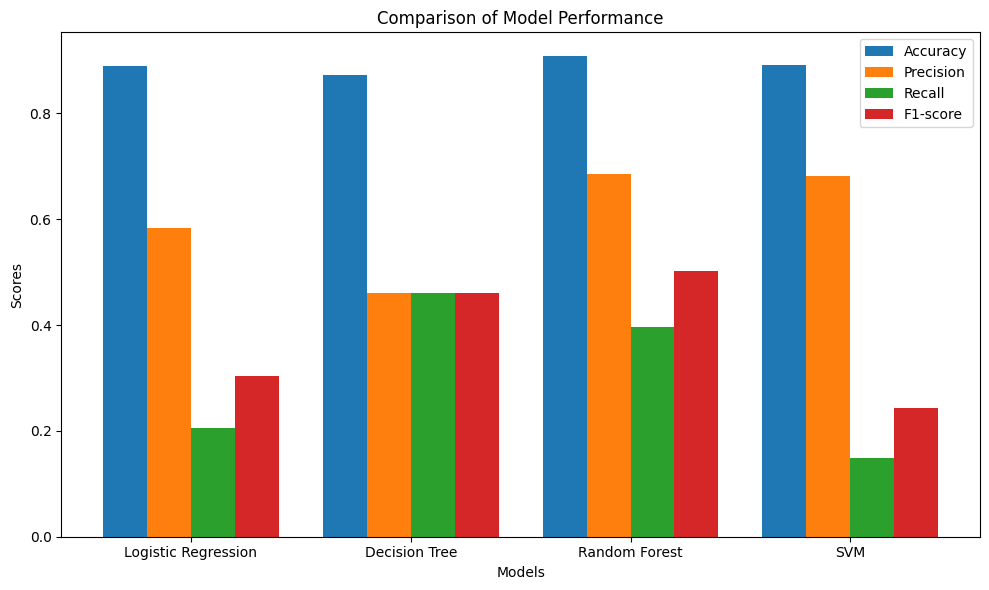

In [18]:
import matplotlib.pyplot as plt

# Métricas de cada modelo
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
accuracy = [0.8895773401194955, 0.8733126797964151, 0.9079442354503209, 0.8920115069705687]
precision = [0.5833333333333334, 0.4599434495758718, 0.6862745098039216, 0.6826086956521739]
recall = [0.20471698113207548, 0.46037735849056605, 0.39622641509433965, 0.1481132075471698]
f1_score = [0.30307262569832405, 0.4601603017444602, 0.5023923444976077, 0.24341085271317828]

# Gráfico de barras
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = range(len(models))

plt.bar(index, accuracy, bar_width, label='Accuracy')
plt.bar([i + bar_width for i in index], precision, bar_width, label='Precision')
plt.bar([i + 2 * bar_width for i in index], recall, bar_width, label='Recall')
plt.bar([i + 3 * bar_width for i in index], f1_score, bar_width, label='F1-score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance')
plt.xticks([i + 1.5 * bar_width for i in index], models)
plt.legend()
plt.tight_layout()
plt.show()


Basándonos en estas métricas, el Random Forest parece tener el mejor rendimiento global, con la precisión más alta y un F1-score razonable.

# Ensemble

In [19]:
pip install --upgrade scikit-learn


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='yes')
    recall = recall_score(y_test, y_pred, pos_label='yes')
    f1 = f1_score(y_test, y_pred, pos_label='yes')

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")


In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Bagging con RandomForestClassifier como base
bagging_rf = BaggingClassifier(RandomForestClassifier(), n_estimators=10, random_state=42)
bagging_rf.fit(X_train, y_train)

# Evaluar el rendimiento del ensemble Bagging con RandomForestClassifier
print("Bagging (Random Forest):")
evaluate_performance(bagging_rf, X_test, y_test)


Bagging (Random Forest):
Accuracy: 0.9077229475547688
Precision: 0.7032374100719424
Recall: 0.36886792452830186
F1-score: 0.4839108910891089


Parece que el ensemble Bagging con RandomForestClassifier como base está dando buenos resultados en términos de precisión y exactitud. Aquí hay una interpretación de las métricas de evaluación:

**Accuracy (Exactitud):** La exactitud indica la proporción de predicciones correctas sobre el total de muestras. Un valor de 0.9077 significa que el modelo clasifica correctamente aproximadamente el 90.77% de las muestras en el conjunto de prueba.

**Precision (Precisión):** La precisión representa la proporción de verdaderos positivos (instancias correctamente clasificadas como positivas) sobre el total de predicciones positivas realizadas por el modelo. Un valor de 0.7032 indica que aproximadamente el 70.32% de las predicciones positivas son correctas.

**Recall (Recuperación):** La recuperación, también conocida como sensibilidad o tasa de verdaderos positivos, mide la proporción de instancias positivas que son correctamente identificadas por el modelo. Un valor de 0.3689 indica que el modelo identifica correctamente aproximadamente el 36.89% de todas las instancias positivas en el conjunto de prueba.

**F1-score (Puntuación F1):** La puntuación F1 es la media armónica de precisión y recuperación. Proporciona una medida equilibrada entre precisión y recuperación. Un valor de 0.4839 sugiere que el modelo tiene un equilibrio razonable entre precisión y recuperación.

En general, estos resultados indican que el modelo Bagging con RandomForestClassifier como base es capaz de hacer predicciones con una alta exactitud y precisión en el conjunto de prueba. Sin embargo, la recuperación es relativamente baja, lo que sugiere que el modelo puede tener dificultades para identificar todas las instancias positivas en los datos.

In [22]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)

# Evaluar el rendimiento del modelo AdaBoost
print("AdaBoost:")
evaluate_model(adaboost, X_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost:
Accuracy: 0.8990927196282363
Precision: 0.6312056737588653
Recall: 0.33584905660377357
F1-score: 0.43842364532019706


Comparando estos resultados con los del modelo Bagging con RandomForestClassifier como base, vemos que el modelo AdaBoost tiene una precisión y exactitud ligeramente más bajas, pero una recuperación aún más baja. Esto podría indicar que AdaBoost tiene dificultades para identificar correctamente las instancias positivas en los datos.

En general, tanto el modelo Bagging con RandomForestClassifier como base como el modelo AdaBoost parecen tener un rendimiento razonablemente bueno, pero el modelo Bagging con RandomForestClassifier parece ser ligeramente superior en términos de precisión y recuperación.